## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
data = data.drop(columns=['RowNumber', "CustomerId", "Surname"])

In [4]:
data = pd.get_dummies(data, drop_first=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


<Axes: xlabel='Exited', ylabel='count'>

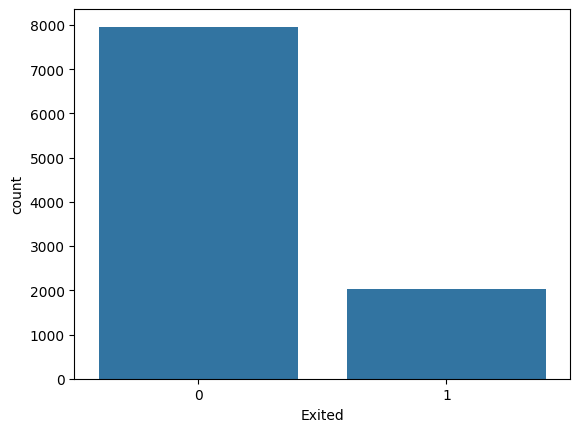

In [5]:
sns.countplot(x=data['Exited'])

In [6]:
data2 = data.drop(columns='Exited')

<Axes: title={'center': 'Correlated with diagnosis_M'}>

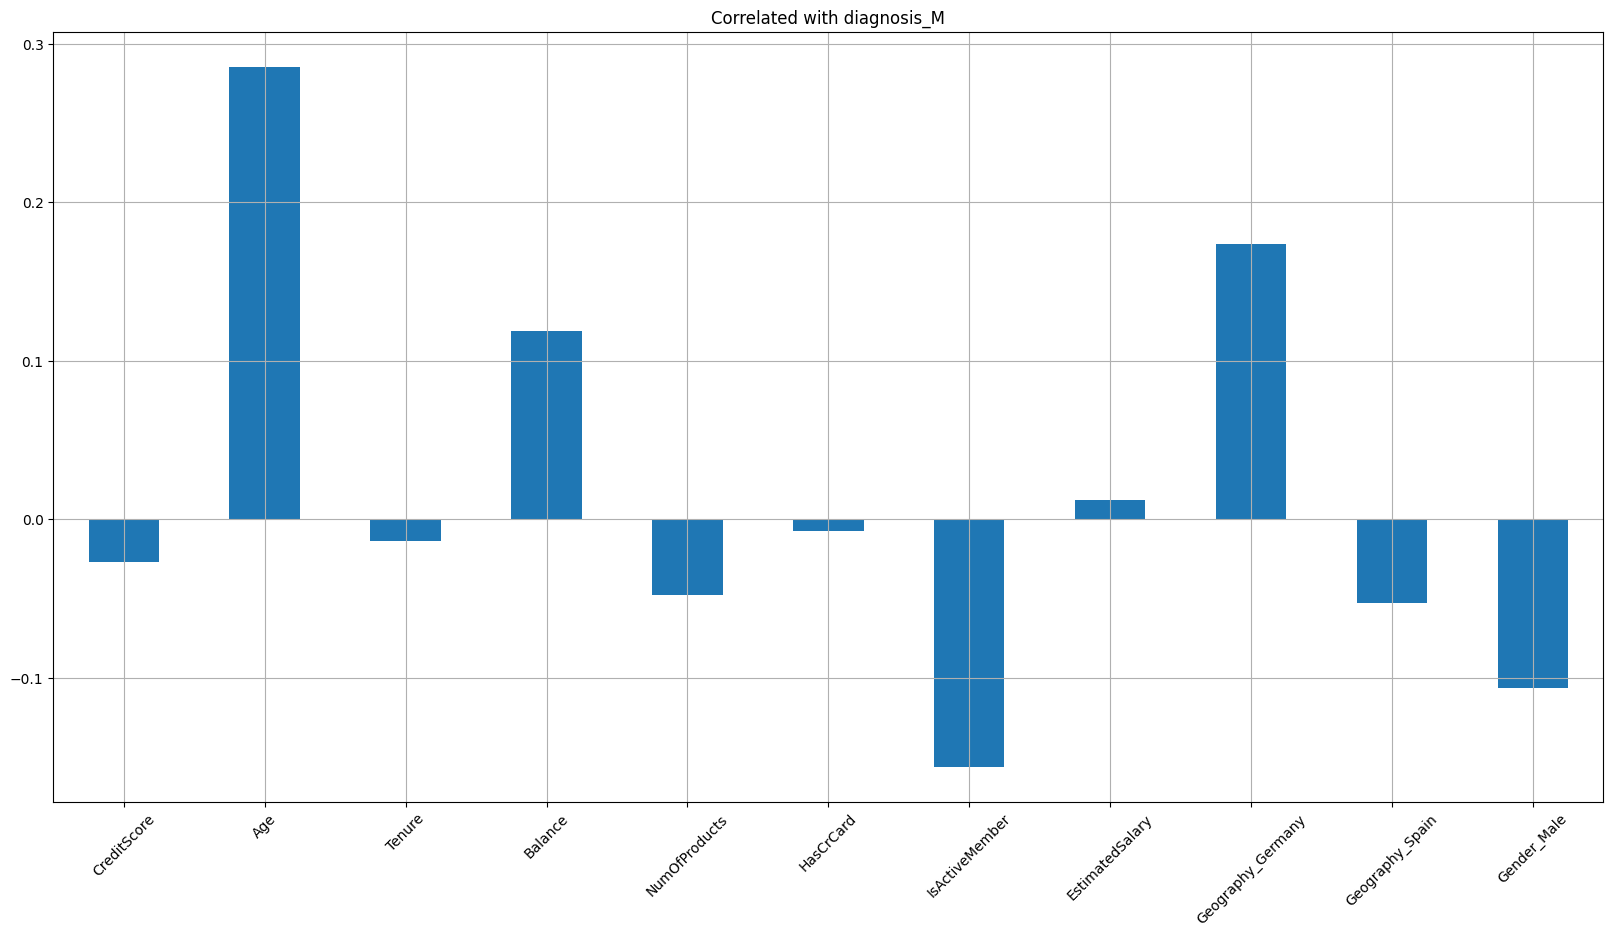

In [7]:
data2.corrwith(data['Exited'],).plot.bar(figsize=(20,10), title="Correlated with diagnosis_M", rot=45, grid=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
x = data.drop(columns='Exited')
y = data['Exited']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [16]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

res = pd.DataFrame(data=[["Logistic Regression", acc, f1, prec, rec]],columns=['Model','Accuracy', 'F1', 'Precision', 'Recall'])
res

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8335,0.368121,0.687943,0.251295


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

res2 = pd.DataFrame(data=[["Random Forest Classifier", acc, f1, prec, rec]],columns=['Model','Accuracy', 'F1', 'Precision', 'Recall'])
res = pd.concat([res,res2], ignore_index=True)
res

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8335,0.368121,0.687943,0.251295
1,Random Forest Classifier,0.8830,0.626198,0.816667,0.507772


## XGBoost Classifier

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = xgb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

res3 = pd.DataFrame(data=[["XGBoost Classifier", acc, f1, prec, rec]],columns=['Model','Accuracy', 'F1', 'Precision', 'Recall'])
res = pd.concat([res,res3], ignore_index=True)
res

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8335,0.368121,0.687943,0.251295
1,Random Forest Classifier,0.8830,0.626198,0.816667,0.507772
2,XGBoost Classifier,0.8670,0.605341,0.708333,0.528497
3,XGBoost Classifier,0.8670,0.605341,0.708333,0.528497


In [35]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2 , 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5 , 0.7]
}
randomized_search = RandomizedSearchCV(estimator = xgb, param_distributions = params,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.858 total time=   0.3s[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.865 total time=   0.4s

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.863 total time=   0.4s
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.860 total time=   0.5s[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3;, score=0.835 total time=   0.5s

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.832 total time=   0.7s
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=1;, score=0.868 total time=   0.7s
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [38]:
print(randomized_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [41]:
xgb = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None,)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = xgb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

res4 = pd.DataFrame(data=[["XGBoost Classifier Randomized Search", acc, f1, prec, rec]],columns=['Model','Accuracy', 'F1', 'Precision', 'Recall'])
res = pd.concat([res,res4], ignore_index=True)
res

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8335,0.368121,0.687943,0.251295
1,Random Forest Classifier,0.8830,0.626198,0.816667,0.507772
2,XGBoost Classifier,0.8670,0.605341,0.708333,0.528497
3,XGBoost Classifier,0.8670,0.605341,0.708333,0.528497
4,XGBoost Classifier Randomized Search,0.8815,0.629108,0.794466,0.520725
